<a href="https://colab.research.google.com/github/rishabhjaiswal10/ML-Projects/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from datetime import date, timedelta
import yfinance as yf
from yahoofinancials import YahooFinancials as yfn


In [ ]:
today = date.today()
start=datetime.datetime(2022, 1, 1, 0, 0)
end=datetime.datetime(today.year,today.month,today.day)
apple_data = yf.download('AAPL', start , end,progress=False)
print(apple_data)
# Reading data

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.683868   
2022-01-04  182.630005  182.940002  179.119995  179.699997  178.390701   
2022-01-05  179.610001  180.169998  174.639999  174.919998  173.645523   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.746811   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.915573   
...                ...         ...         ...         ...         ...   
2023-02-07  150.639999  155.229996  150.639999  154.649994  154.414230   
2023-02-08  153.880005  154.580002  151.169998  151.919998  151.688400   
2023-02-09  153.779999  154.330002  150.419998  150.869995  150.639999   
2023-02-10  149.460007  151.339996  149.220001  151.009995  151.009995   
2023-02-13  150.949997  154.259995  150.919998  153.850006  153.850006   

               Volume  
Date         

In [ ]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683868,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645523,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746811,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100


In [ ]:
#Checking if Cleaning is needed in data

# apple_data.any()
# apple_data.isnull().any()
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 280 entries, 2022-01-03 to 2023-02-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       280 non-null    float64
 1   High       280 non-null    float64
 2   Low        280 non-null    float64
 3   Close      280 non-null    float64
 4   Adj Close  280 non-null    float64
 5   Volume     280 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.3 KB


In [ ]:
apple_data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
apple_data.any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

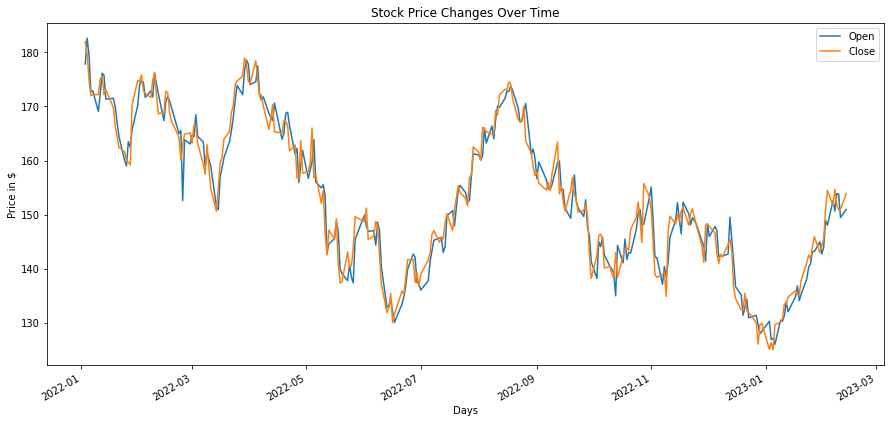

In [ ]:
plt.title("Stock Price Changes Over Time")
apple_data['Open'].plot(Label="Open Price",figsize=(15,7))
apple_data['Close'].plot(Label="Close Price")
plt.ylabel('Price in $')
plt.xlabel('Days')
plt.legend()
plt.show()

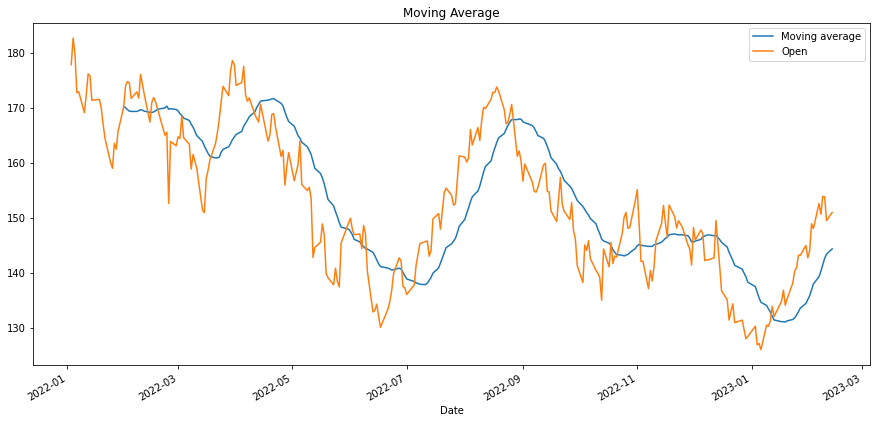

In [ ]:
plt.title("Moving Average")
apple_data['Moving Average']=apple_data['Open'].rolling(30).mean()
apple_data['Moving Average'].plot(label="Moving average",figsize=(15,7))
apple_data['Open'].plot(Label="Open Price",figsize=(15,7))
# apple_data['Close'].plot(Label="Close Price")
plt.legend()

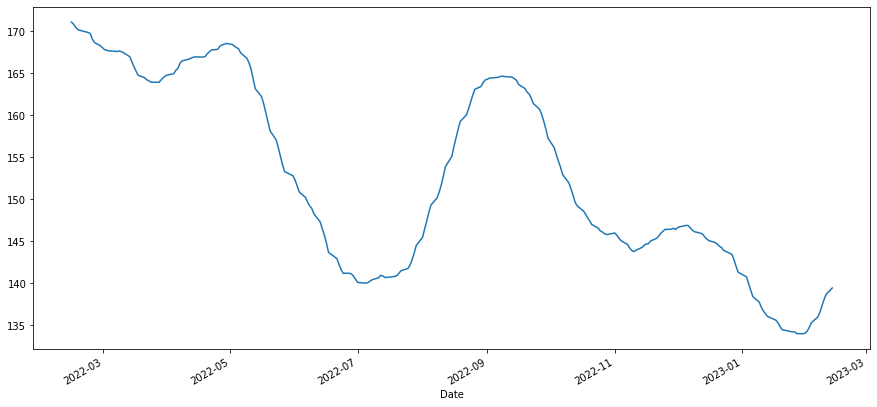

In [ ]:
apple_data['Moving Average'].plot(label="Apple",figsize=(15,7))

In [ ]:
apple_data["Date"] = apple_data.index
apple_data= apple_data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
apple_data["Date"]

Date
2022-01-03   2022-01-03
2022-01-04   2022-01-04
2022-01-05   2022-01-05
2022-01-06   2022-01-06
2022-01-07   2022-01-07
                ...    
2023-02-07   2023-02-07
2023-02-08   2023-02-08
2023-02-09   2023-02-09
2023-02-10   2023-02-10
2023-02-13   2023-02-13
Name: Date, Length: 280, dtype: datetime64[ns]

In [ ]:
import plotly.express as px
figure = px.bar(apple_data, x = "Date", y= "Volume")
figure.show()

In [ ]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-01-03,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683868,104487900
2022-01-04,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400
2022-01-05,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645523,94537600
2022-01-06,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746811,96904000
2022-01-07,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100


In [ ]:
apple_data['Daily Return'] = apple_data['Close']-apple_data['Open']

In [ ]:
apple_data['Daily Return'].mean()

0.12064252580915179

In [ ]:
apple_data["Trends"] =  np.where(apple_data["Daily Return"] >= 0 , "Positive", "Negative")
apple_data

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trends
Date,,,,,,,,,
2022-01-03,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683868,104487900,4.179993,Positive
2022-01-04,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400,-2.930008,Negative
2022-01-05,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645523,94537600,-4.690002,Negative
2022-01-06,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746811,96904000,-0.699997,Negative
2022-01-07,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100,-0.720001,Negative
...,...,...,...,...,...,...,...,...,...
2023-02-07,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,4.009995,Positive
2023-02-08,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-1.960007,Negative
2023-02-09,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-2.910004,Negative


Text(0.5, 1.0, 'Trend Frequency')

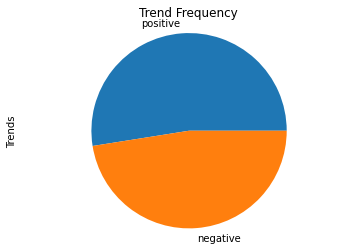

In [ ]:
apple_data.Trends.value_counts().plot(kind='pie',labels=['positive','negative'])
plt.axis('equal')
plt.title('Trend Frequency')

In [ ]:
today = date.today()
start=datetime.datetime(2022, 1, 1, 0, 0)
end=datetime.datetime(today.year,today.month,today.day)
amazon_data = yf.download('AMZN', start , end,progress=False)
google_data = yf.download('GOOGL', start , end,progress=False)
microsoft_data = yf.download('MSFT', start , end,progress=False)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   
2022-01-06  163.450500  164.800003  161.936996  163.253998  163.253998   
2022-01-07  163.839005  165.243500  162.031006  162.554001  162.554001   
...                ...         ...         ...         ...         ...   
2023-02-07  101.169998  102.410004   98.080002  102.110001  102.110001   
2023-02-08  102.040001  102.669998   98.779999  100.050003  100.050003   
2023-02-09  101.320000  101.779999   97.570000   98.239998   98.239998   
2023-02-10   97.559998   98.820000   96.230003   97.610001   97.610001   
2023-02-13   97.849998   99.680000   96.910004   99.540001   99.540001   

               Volume  
Date         

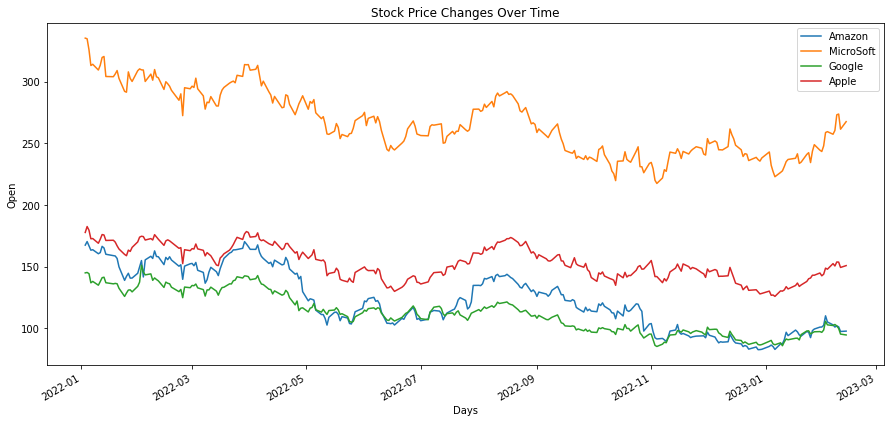

In [ ]:
plt.title("Stock Price Changes Over Time")
amazon_data['Open'].plot(label="Amazon",figsize=(15,7))
microsoft_data['Open'].plot(label="MicroSoft")
google_data['Open'].plot(label="Google")
apple_data['Open'].plot(label="Apple")
plt.ylabel('Open')
plt.xlabel('Days')
plt.legend()
plt.show()

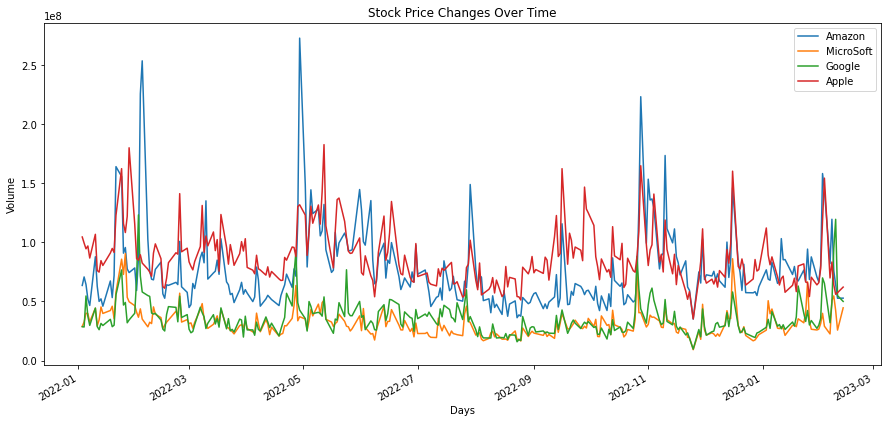

In [ ]:
plt.title("Stock Price Changes Over Time")
amazon_data['Volume'].plot(label="Amazon",figsize=(15,7))
microsoft_data['Volume'].plot(label="MicroSoft")
google_data['Volume'].plot(label="Google")
apple_data['Volume'].plot(label="Apple")
plt.ylabel('Volume')
plt.xlabel('Days')
plt.legend()
plt.show()

In [ ]:
google_data['Daily Return'] = google_data['Close']-google_data['Open']
microsoft_data['Daily Return'] = microsoft_data['Close']-microsoft_data['Open']
amazon_data['Daily Return'] = amazon_data['Close']-amazon_data['Open']

In [ ]:
correlation=pd.concat([apple_data['Daily Return'],google_data['Daily Return'],microsoft_data['Daily Return'],amazon_data['Daily Return']],axis=1)
correlation.columns={"Apple Return","Google Return","Microsoft Return","Amazon Return"}
correlation

,Apple Return,Microsoft Return,Amazon Return,Google Return
Date,,,,
2022-01-03,4.179993,-0.063492,-0.600006,2.854492
2022-01-04,-2.930008,-0.996490,-5.819977,-2.916000
2022-01-05,-4.690002,-6.645004,-9.479980,-2.526001
2022-01-06,-0.699997,0.748993,0.730011,-0.196503
2022-01-07,-0.720001,-1.128494,-0.109985,-1.285004
...,...,...,...,...
2023-02-07,4.009995,4.419998,7.029999,0.940002
2023-02-08,-1.960007,-2.680000,-6.470001,-1.989998
2023-02-09,-2.910004,-4.989998,-10.179993,-3.080002


In [ ]:
correlation.corr()

,Apple Return,Microsoft Return,Amazon Return,Google Return
Apple Return,1.000000,0.786234,0.829474,0.777063
Microsoft Return,0.786234,1.000000,0.848992,0.810243
Amazon Return,0.829474,0.848992,1.000000,0.812527
Google Return,0.777063,0.810243,0.812527,1.000000


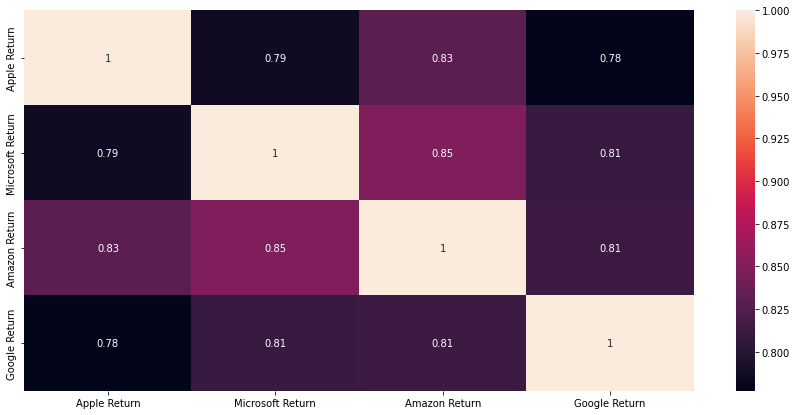

In [ ]:
import seaborn as sns
cor=correlation.corr()
plt.figure(figsize=(15,7))
sns.heatmap(data=cor,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0b98e2430>,
      dtype=object)

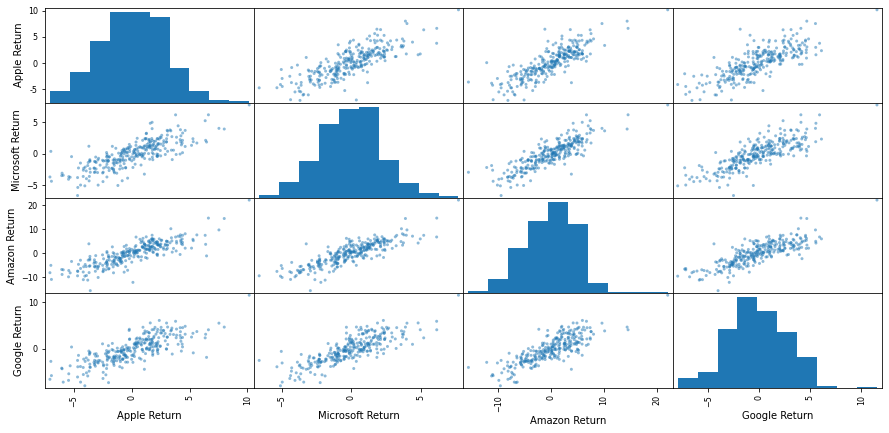

In [ ]:
from pandas.plotting import scatter_matrix as scx
scx(correlation,figsize=(15,7))